<h1>Question-01</h1>
<p>What is the average transaction amount ($) across different store types, and how does it vary by season?</p>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
file_path = "K:\DataSolution -360\Data\Data Solution 360 - Sheet1.csv"
df = pd.read_csv(file_path)
print(df.head())


<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\D'
C:\Users\thund\AppData\Local\Temp\ipykernel_6508\48664713.py:4: SyntaxWarning: invalid escape sequence '\D'
  file_path = "K:\DataSolution -360\Data\Data Solution 360 - Sheet1.csv"


   Transaction_ID                 Date       Customer_Name  Total_Items  \
0      1000667075  2022-09-12 17:40:23          David King            5   
1      1000156022  2022-01-20 23:03:20  Michael Williamson            3   
2      1000681674  2022-10-15 07:49:59       Chelsea Garza            7   
3      1000692089  2024-04-05 09:39:58         Scott Lopez            5   
4      1000328702  2021-05-28 04:16:54       Crystal Adams            4   

   Amount($)  Payment_Method     City         Store_Type  Discount_Applied  \
0      30.98      Debit Card  Chicago     Warehouse Club              True   
1      23.29     Credit Card   Boston     Warehouse Club              True   
2      25.62      Debit Card  Chicago           Pharmacy             False   
3      14.64  Mobile Payment  Atlanta           Pharmacy             False   
4      62.27     Credit Card    Miami  Convenience Store             False   

  Customer_Category  Season                   Promotion  
0          Teenager   

In [20]:


df['Amount($)'] = pd.to_numeric(df['Amount($)'], errors='coerce')
df['Season'] = df['Season'].astype('category')

avg_transaction = df.groupby(['Store_Type', 'Season'])['Amount($)'].mean()

print(avg_transaction)
avg_transaction.to_csv('average_transaction_by_store_and_season.csv', index=False)



Store_Type         Season
Convenience Store  Fall      52.872504
                   Spring    53.537230
                   Summer    53.345305
                   Winter    51.595034
Department Store   Fall      51.384757
                   Spring    52.573781
                   Summer    52.782716
                   Winter    52.575652
Pharmacy           Fall      52.363508
                   Spring    52.458672
                   Summer    52.049365
                   Winter    53.218725
Specialty Store    Fall      51.823011
                   Spring    53.524048
                   Summer    53.594788
                   Winter    51.782338
Supermarket        Fall      52.285728
                   Spring    52.691298
                   Summer    51.443950
                   Winter    52.640624
Warehouse Club     Fall      52.027853
                   Spring    51.597471
                   Summer    53.009120
                   Winter    51.818594
Name: Amount($), dtype: float64


C:\Users\thund\AppData\Local\Temp\ipykernel_6508\3712259542.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_transaction = df.groupby(['Store_Type', 'Season'])['Amount($)'].mean()


C:\Users\thund\AppData\Local\Temp\ipykernel_6508\3031767218.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  store_season_analysis = df.groupby(['Store_Type', 'Season']).agg({


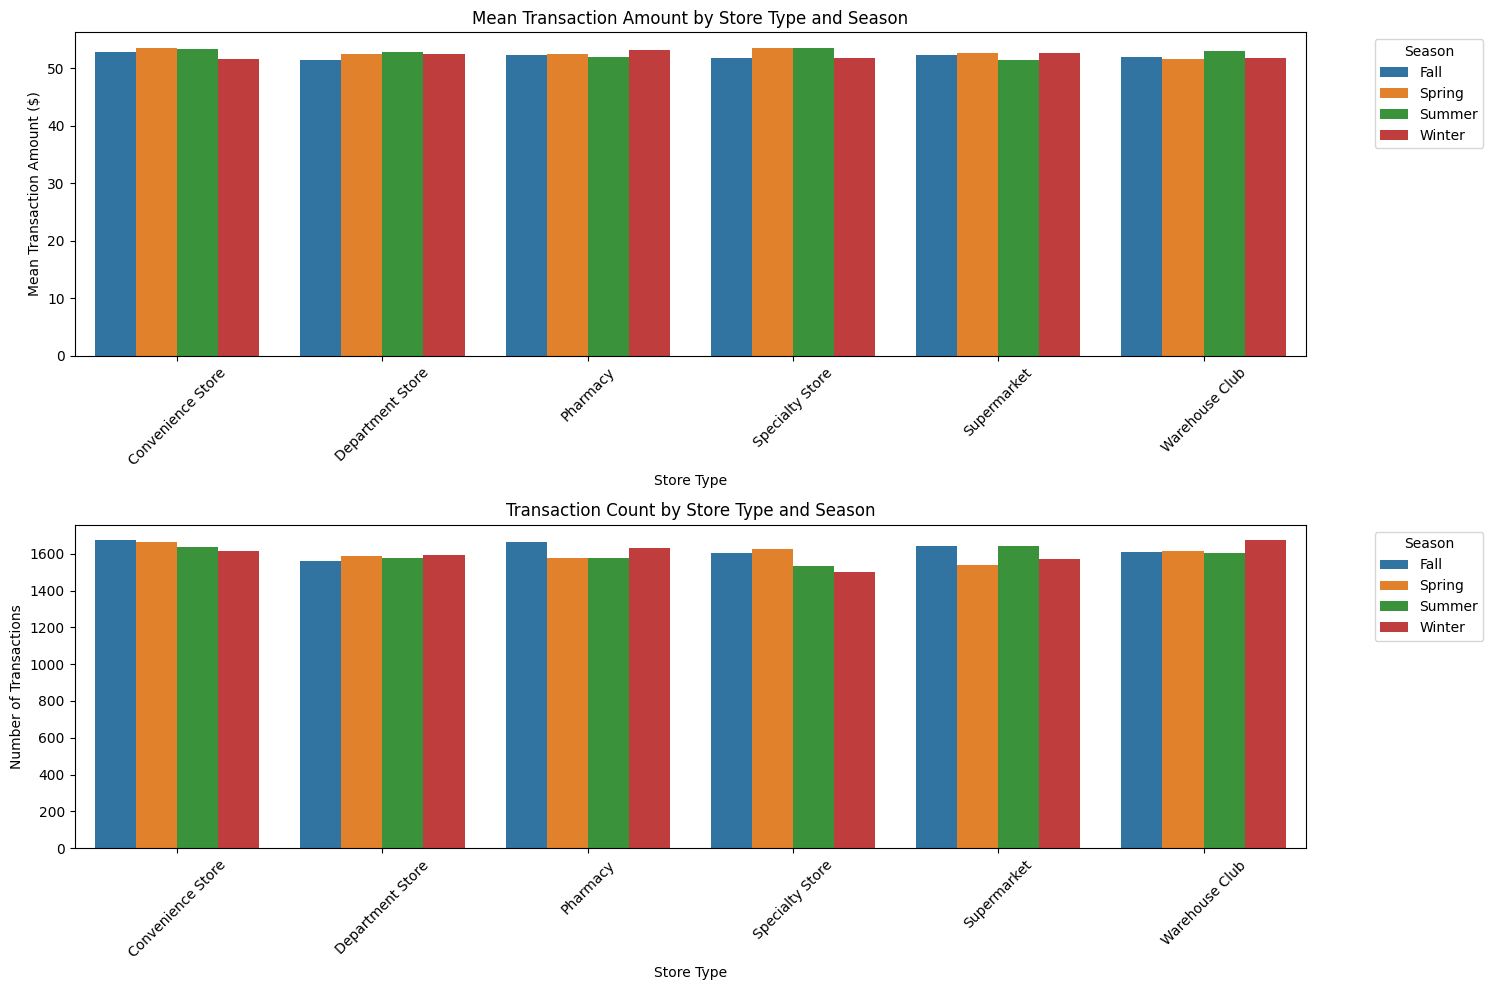

<Figure size 640x480 with 0 Axes>

In [23]:

# Ensure numeric conversion
df['Amount($)'] = pd.to_numeric(df['Amount($)'], errors='coerce')

# Aggregate data by store type and season
store_season_analysis = df.groupby(['Store_Type', 'Season']).agg({
    'Amount($)': ['count', 'mean', 'median', 'sum']
}).reset_index()

# Flatten column names
store_season_analysis.columns = [
    'Store_Type', 
    'Season', 
    'Transaction_Count', 
    'Mean_Transaction_Amount', 
    'Median_Transaction_Amount', 
    'Total_Sales'
]

# Visualization
plt.figure(figsize=(15, 10))

# Subplot 1: Mean Transaction Amount by Store Type and Season
plt.subplot(2, 1, 1)
sns.barplot(
    x='Store_Type', 
    y='Mean_Transaction_Amount', 
    hue='Season', 
    data=store_season_analysis
)
plt.title('Mean Transaction Amount by Store Type and Season')
plt.xlabel('Store Type')
plt.ylabel('Mean Transaction Amount ($)')
plt.xticks(rotation=45)
plt.legend(title='Season', bbox_to_anchor=(1.05, 1), loc='upper left')

# Subplot 2: Transaction Count by Store Type and Season
plt.subplot(2, 1, 2)
sns.barplot(
    x='Store_Type', 
    y='Transaction_Count', 
    hue='Season', 
    data=store_season_analysis
)
plt.title('Transaction Count by Store Type and Season')
plt.xlabel('Store Type')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.legend(title='Season', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


plt.tight_layout()
plt.show()

<h1> <b>Question-02</b> </h1>
<p>Which payment method is most commonly used in high-value transactions (above the average transaction amount), and how does it differ across cities?</p>

In [4]:
df['Amount($)'] = pd.to_numeric(df['Amount($)'], errors='coerce')


average_amount = df['Amount($)'].mean()
print(f"Average Transaction Amount: ${average_amount:.2f}")


high_value_transactions = df[df['Amount($)'] > average_amount]


most_common_payment = high_value_transactions['Payment_Method'].value_counts().idxmax()
print(f"Most Common Payment Method in High-Value Transactions: {most_common_payment}")

# Analyze how payment methods for high-value transactions differ across cities
payment_by_city = high_value_transactions.groupby(['City', 'Payment_Method']).size().reset_index(name='Count')



Average Transaction Amount: $52.46
Most Common Payment Method in High-Value Transactions: Debit Card


In [5]:
print(payment_by_city)

             City  Payment_Method  Count
0         Atlanta            Cash    467
1         Atlanta     Credit Card    452
2         Atlanta      Debit Card    451
3         Atlanta  Mobile Payment    506
4          Boston            Cash    485
5          Boston     Credit Card    471
6          Boston      Debit Card    484
7          Boston  Mobile Payment    427
8         Chicago            Cash    516
9         Chicago     Credit Card    507
10        Chicago      Debit Card    484
11        Chicago  Mobile Payment    455
12         Dallas            Cash    454
13         Dallas     Credit Card    466
14         Dallas      Debit Card    538
15         Dallas  Mobile Payment    422
16        Houston            Cash    492
17        Houston     Credit Card    484
18        Houston      Debit Card    492
19        Houston  Mobile Payment    462
20    Los Angeles            Cash    485
21    Los Angeles     Credit Card    453
22    Los Angeles      Debit Card    518
23    Los Angele

<b>Ploting of <i>Payment Methods for High-Value Transactions by City</b>

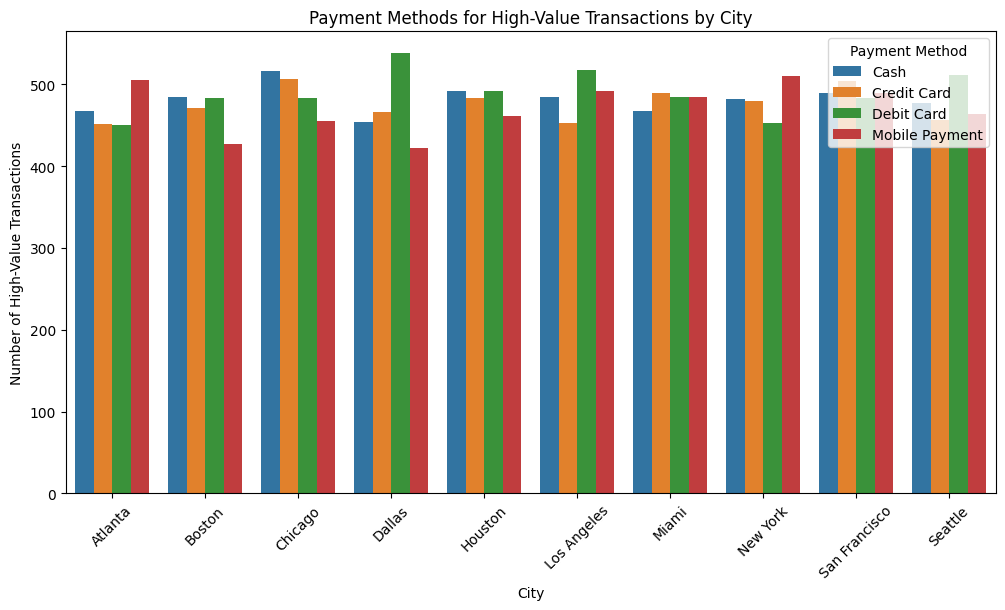

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'City' and 'Payment_Method' and count the occurrences
payment_by_city = high_value_transactions.groupby(['City', 'Payment_Method']).size().reset_index(name='Count')

# Plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=payment_by_city, x='City', y='Count', hue='Payment_Method')

plt.title('Payment Methods for High-Value Transactions by City')
plt.xlabel('City')
plt.ylabel('Number of High-Value Transactions')
plt.legend(title='Payment Method')
plt.xticks(rotation=45)
plt.show()


<h1><b>Question-03</b></h1>
<p>How do the sales amounts in transactions with discounts compare to those without discounts, and what trends can be observed over the month?</p>

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract month from the Date column
df['Month'] = pd.to_datetime(df['Date']).dt.to_period('M')
discount_analysis = df.groupby('Discount_Applied')['Amount($)'].agg([
    'mean',
    'median',
    'sum',
    'count'
])

monthly_discount_trend = df.groupby(['Month', 'Discount_Applied'])['Amount($)'].agg([
    'mean',
    'sum'
])


In [8]:
# Statistical summary
print("Discount vs. Non-Discount Transaction Analysis:")
print(discount_analysis)

print("\nMonthly Discount Trend:")
print(monthly_discount_trend)

# Additional insights
discount_percentage = df['Discount_Applied'].mean() * 100
print(f"\nPercentage of Transactions with Discount: {discount_percentage:.2f}%")

Discount vs. Non-Discount Transaction Analysis:
                       mean  median         sum  count
Discount_Applied                                      
False             52.314621   51.83   997482.88  19067
True              52.602330   52.71  1022221.08  19433

Monthly Discount Trend:
                               mean       sum
Month   Discount_Applied                     
2020-01 False             51.632433  17400.13
        True              50.837412  18860.68
2020-02 False             52.985730  18862.92
        True              52.205519  19107.22
2020-03 False             54.230623  21746.48
...                             ...       ...
2024-03 True              54.890206  21297.40
2024-04 False             51.052694  18378.97
        True              53.199870  16332.36
2024-05 False             50.266256  11008.31
        True              53.144000  12223.12

[106 rows x 2 columns]

Percentage of Transactions with Discount: 50.48%


<Figure size 1200x600 with 0 Axes>

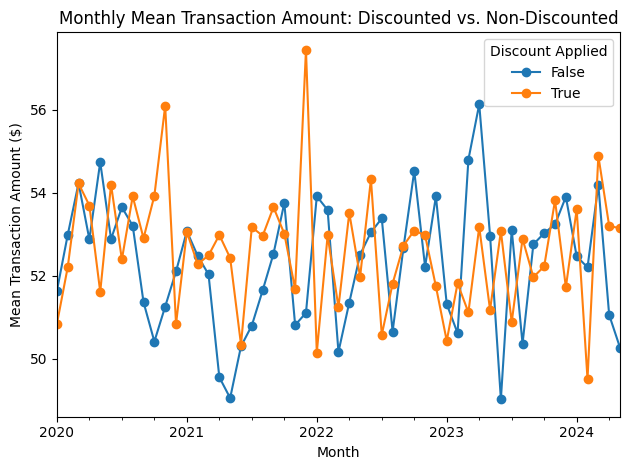

In [9]:

# Visualization of monthly trends
plt.figure(figsize=(12, 6))
# Plotting mean transaction amount
monthly_discount_trend['mean'].unstack().plot(kind='line', marker='o')
plt.title('Monthly Mean Transaction Amount: Discounted vs. Non-Discounted')
plt.xlabel('Month')
plt.ylabel('Mean Transaction Amount ($)')
plt.legend(title='Discount Applied')
plt.tight_layout()
plt.show()



<h1><b>Question-04</b></h1>
<p>How effective are different promotions in driving higher transaction amounts, and which promotion type performs best in each season?</p>


In [10]:
#Calculate Average Number of Items Per Transaction by City
df['Total_Items'] = pd.to_numeric(df['Total_Items'])

# Calculate average items per transaction by city
avg_items_per_city = df.groupby('City')['Total_Items'].mean().reset_index()
avg_items_per_city = avg_items_per_city.sort_values(by='Total_Items', ascending=False)

# Get the top 3 cities
top_cities = avg_items_per_city.head(3)['City'].tolist()
print("Top 3 Cities with Highest Average Number of Items Per Transaction:")
print(avg_items_per_city.head(3))


Top 3 Cities with Highest Average Number of Items Per Transaction:
      City  Total_Items
2  Chicago     5.547601
4  Houston     5.530272
6    Miami     5.521909


In [11]:

# Filter data for top cities
top_cities_data = df[df['City'].isin(top_cities)]

# Group by City and Season, and calculate total sales amounts
sales_by_season = top_cities_data.groupby(['City', 'Season'])['Amount($)'].sum()

print("Sales Amounts for Top Cities Across Seasons:")
print(sales_by_season)


Sales Amounts for Top Cities Across Seasons:
City     Season
Chicago  Fall      50343.27
         Spring    51831.02
         Summer    51261.90
         Winter    51710.00
Houston  Fall      52117.66
         Spring    50387.61
         Summer    50155.51
         Winter    50564.55
Miami    Fall      52999.92
         Spring    50267.66
         Summer    49756.18
         Winter    47964.04
Name: Amount($), dtype: float64


C:\Users\thund\AppData\Local\Temp\ipykernel_6508\1472980043.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_season = top_cities_data.groupby(['City', 'Season'])['Amount($)'].sum()


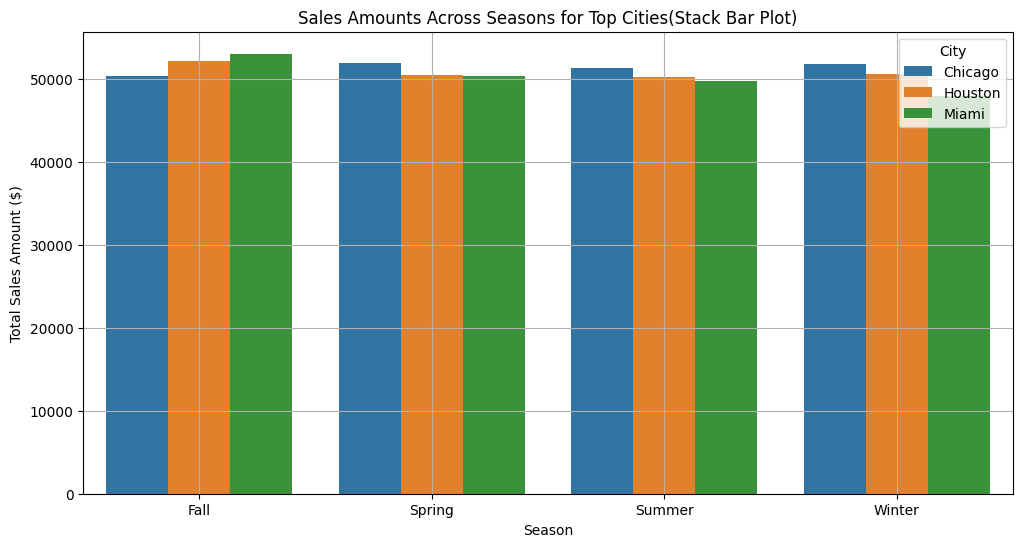

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sales_by_season = sales_by_season.reset_index()


plt.figure(figsize=(12, 6))
sns.barplot(data=sales_by_season, x='Season', y='Amount($)', hue='City')
plt.title('Sales Amounts Across Seasons for Top Cities(Stack Bar Plot)')
plt.xlabel('Season')
plt.ylabel('Total Sales Amount ($)')
plt.legend(title='City')
plt.grid(True)
plt.show()


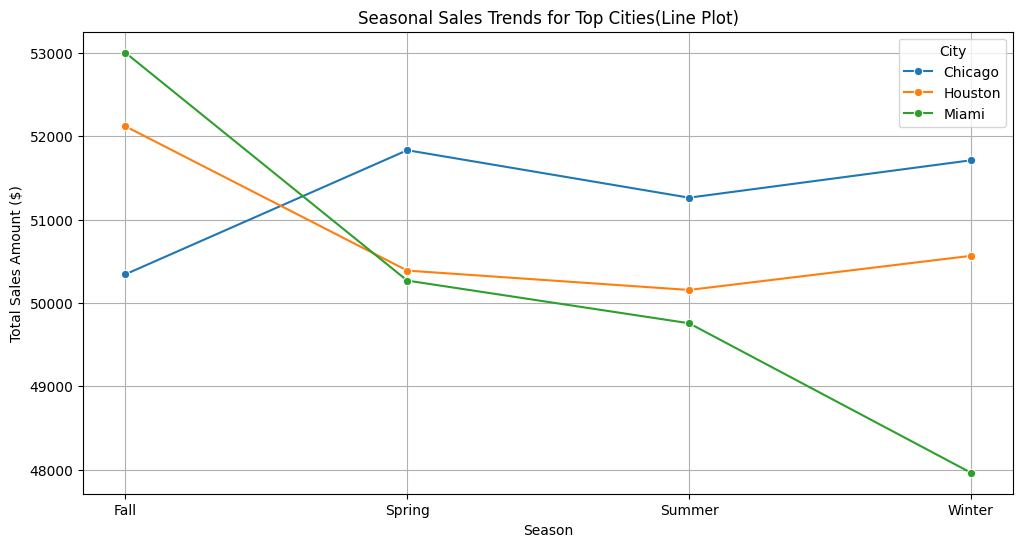

In [13]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_by_season, x='Season', y='Amount($)', hue='City', marker='o')
plt.title('Seasonal Sales Trends for Top Cities(Line Plot)')
plt.xlabel('Season')
plt.ylabel('Total Sales Amount ($)')
plt.legend(title='City')
plt.grid(True)
plt.show()


<h1> Question-05</h1>

In [14]:
# Ensure Amount($) is numeric
df['Amount($)'] = pd.to_numeric(df['Amount($)'])

# Group by Promotion and calculate the mean transaction amount
promotion_performance = df.groupby('Promotion')['Amount($)'].mean().reset_index()
promotion_performance = promotion_performance.sort_values(by='Amount($)', ascending=False)

print("Average Transaction Amount by Promotion:")
print(promotion_performance)


Average Transaction Amount by Promotion:
                    Promotion  Amount($)
0      BOGO (Buy One Get One)  52.836072
1  Discount on Selected Items  52.255637


In [15]:
# Group by Season and Promotion and calculate the mean transaction amount
season_promotion_performance = df.groupby(['Season', 'Promotion'])['Amount($)'].mean().reset_index()

best_promotion_by_season = season_promotion_performance.loc[season_promotion_performance.groupby('Season')['Amount($)'].idxmax()]

print("Best Promotion by Season:")
print(best_promotion_by_season)


Best Promotion by Season:
   Season                   Promotion  Amount($)
0    Fall      BOGO (Buy One Get One)  52.678438
3  Spring  Discount on Selected Items  53.177148
4  Summer      BOGO (Buy One Get One)  53.271761
6  Winter      BOGO (Buy One Get One)  52.872204


C:\Users\thund\AppData\Local\Temp\ipykernel_6508\3638652438.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_promotion_performance = df.groupby(['Season', 'Promotion'])['Amount($)'].mean().reset_index()
C:\Users\thund\AppData\Local\Temp\ipykernel_6508\3638652438.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  best_promotion_by_season = season_promotion_performance.loc[season_promotion_performance.groupby('Season')['Amount($)'].idxmax()]


C:\Users\thund\AppData\Local\Temp\ipykernel_6508\432608975.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  promotion_seasonal_data = df.groupby(['Season', 'Promotion']).agg({
C:\Users\thund\AppData\Local\Temp\ipykernel_6508\432608975.py:57: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=45, ha='right')


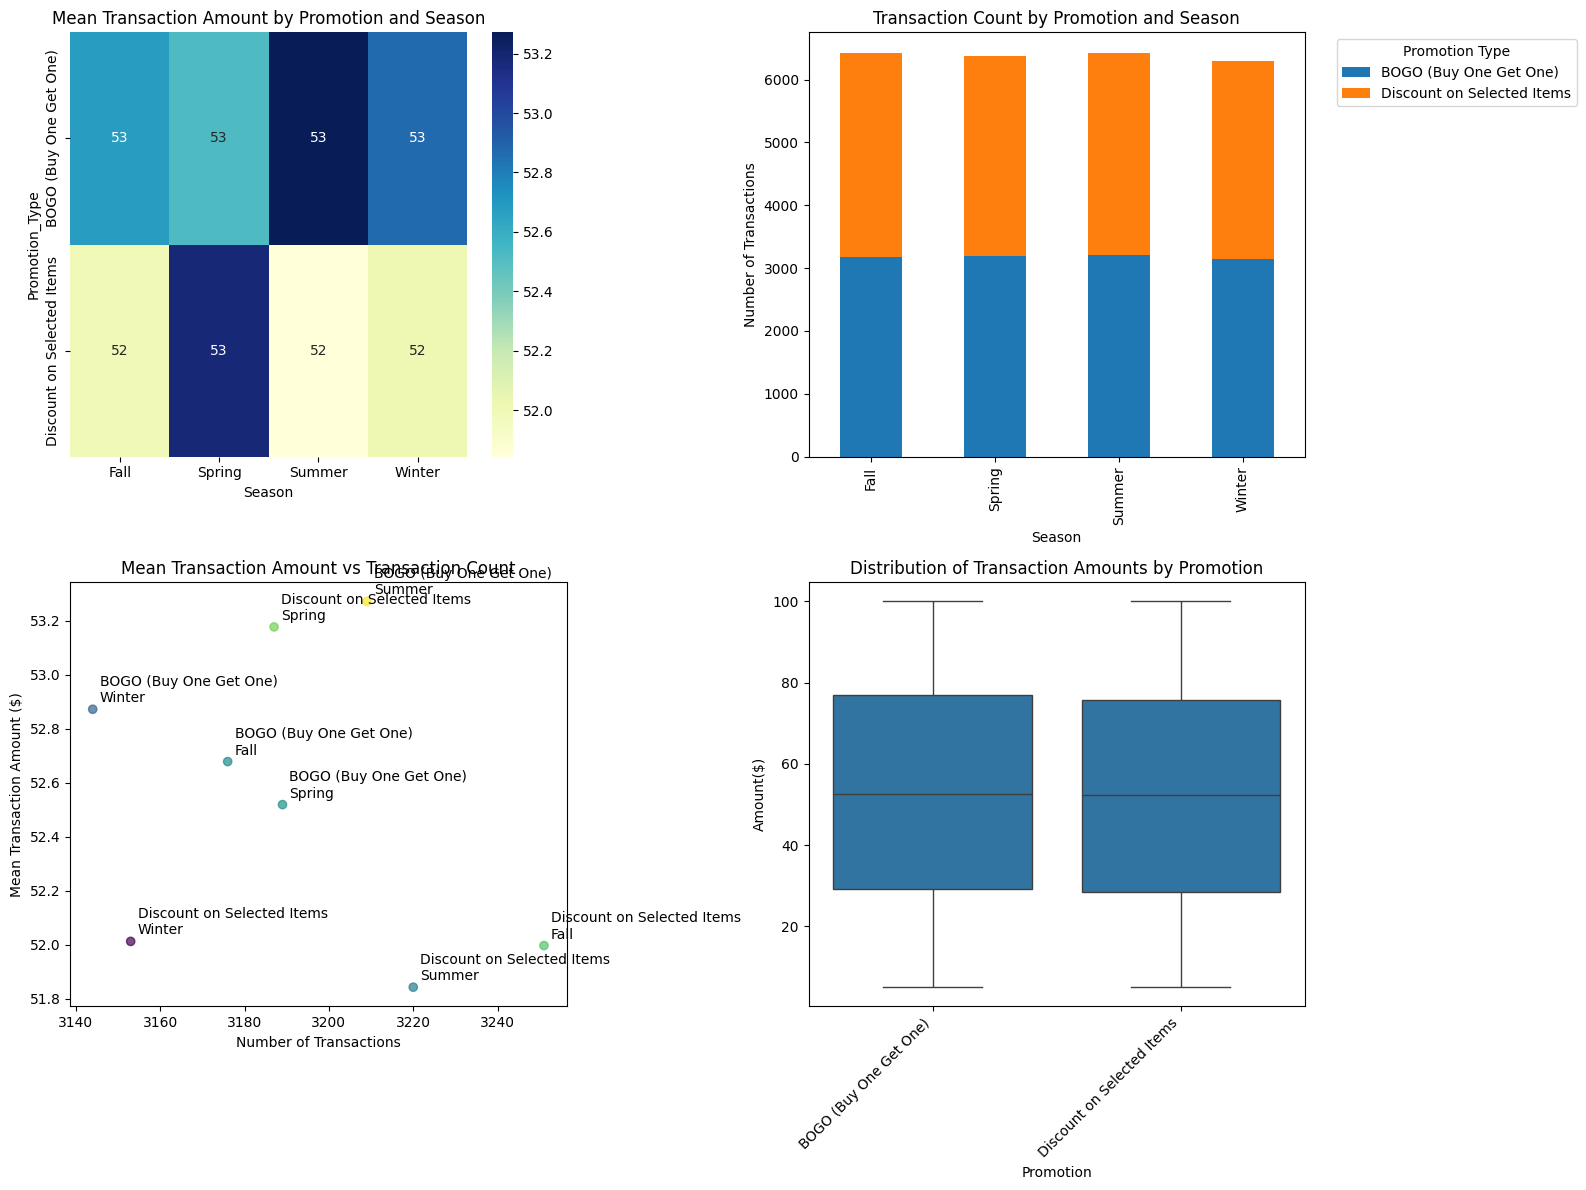

In [16]:


# Prepare data
promotion_seasonal_data = df.groupby(['Season', 'Promotion']).agg({
    'Amount($)': ['mean', 'sum'],
    'Total_Items': ['mean', 'count']
}).reset_index()

# Flatten column names
promotion_seasonal_data.columns = ['Season', 'Promotion_Type', 'Mean_Transaction_Amount', 'Total_Sales', 'Mean_Items', 'Transaction_Count']





# Create a multi-panel visualization
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# 1. Heatmap of Mean Transaction Amounts
pivot_mean_amount = promotion_seasonal_data.pivot(index='Promotion_Type', columns='Season', values='Mean_Transaction_Amount')
sns.heatmap(pivot_mean_amount, annot=True, cmap='YlGnBu', ax=axs[0, 0])
axs[0, 0].set_title('Mean Transaction Amount by Promotion and Season')

# 2. Stacked Bar Chart of Transaction Counts
promotion_counts = promotion_seasonal_data.pivot(index='Season', columns='Promotion_Type', values='Transaction_Count')
promotion_counts.plot(kind='bar', stacked=True, ax=axs[0, 1])
axs[0, 1].set_title('Transaction Count by Promotion and Season')
axs[0, 1].set_xlabel('Season')
axs[0, 1].set_ylabel('Number of Transactions')
axs[0, 1].legend(title='Promotion Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# 3. Scatter Plot of Mean Transaction Amount vs Transaction Count
axs[1, 0].scatter(
    promotion_seasonal_data['Transaction_Count'], 
    promotion_seasonal_data['Mean_Transaction_Amount'], 
    c=promotion_seasonal_data['Total_Sales'], 
    cmap='viridis', 
    alpha=0.7
)
for i, row in promotion_seasonal_data.iterrows():
    axs[1, 0].annotate(
        f"{row['Promotion_Type']}\n{row['Season']}", 
        (row['Transaction_Count'], row['Mean_Transaction_Amount']),
        xytext=(5, 5), 
        textcoords='offset points'
    )
axs[1, 0].set_title('Mean Transaction Amount vs Transaction Count')
axs[1, 0].set_xlabel('Number of Transactions')
axs[1, 0].set_ylabel('Mean Transaction Amount ($)')

# 4. Box Plot of Transaction Amounts by Promotion
sns.boxplot(
    x='Promotion', 
    y='Amount($)', 
    data=df, 
    ax=axs[1, 1]
)
axs[1, 1].set_title('Distribution of Transaction Amounts by Promotion')
axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=45, ha='right')




plt.tight_layout()
plt.show()


In [17]:

# Print summary statistics
print("Promotion Performance Summary:")
summary = promotion_seasonal_data.groupby('Promotion_Type').agg({
    'Mean_Transaction_Amount': ['mean', 'max', 'min'],
    'Total_Sales': 'sum',
    'Transaction_Count': 'sum'
})


print(summary)

Promotion Performance Summary:
                           Mean_Transaction_Amount                        \
                                              mean        max        min   
Promotion_Type                                                             
BOGO (Buy One Get One)                   52.835355  53.271761  52.519019   
Discount on Selected Items               52.257355  53.177148  51.842832   

                           Total_Sales Transaction_Count  
                                   sum               sum  
Promotion_Type                                            
BOGO (Buy One Get One)       671969.16             12718  
Discount on Selected Items   669446.97             12811  
